In [3]:
import pandas as pd
import numpy as np
from scipy.integrate import fixed_quad

# Normalize to interval
def normalize_story(story):
    chs = story[:, 0]
    norm_story = story.copy()
    first_ch = np.min(chs)
    last_ch = np.max(chs)
    norm_story[:, 0] = (chs - first_ch) / (last_ch - first_ch)
    return norm_story

path_1 = "/content/sample_data/SentimentPlots - Saving Sherlock Holmes.csv" # Add first csv path here
path_2 = "/content/sample_data/SentimentPlots - The Sign of an Odd.csv" # Add second csv path here

story_1 = normalize_story(np.array(pd.read_csv(path_1, header=None).iloc[:, :2]))
story_2 = normalize_story(np.array(pd.read_csv(path_2, header=None).iloc[:, :2]))

# Absolute difference of PWL story vectors
diff = lambda c: np.abs(np.interp(c, story_1[:, 0], story_1[:, 1]) - np.interp(c, story_2[:, 0], story_2[:, 1]))

# Compute absolute difference using fixed Gaussian quadrature
abs_diff = fixed_quad(diff, 0, 1)[0]

print(f"Absolute difference: {abs_diff}") # Print final output

Absolute difference: 35.07922011631283


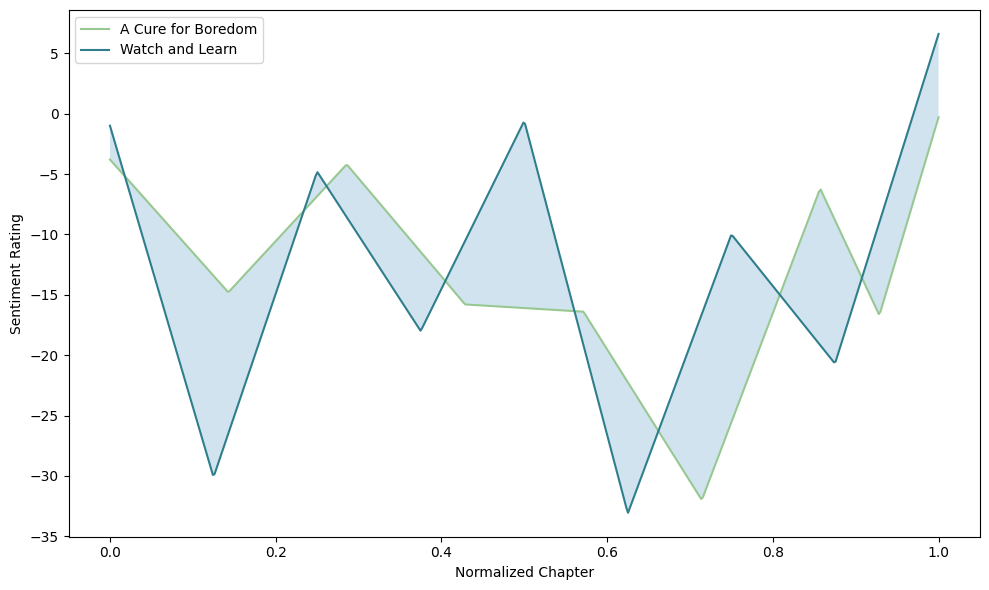

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True

interp_1 = lambda c: np.interp(c, story_1[:,0], story_1[:,1])
interp_2 = lambda c: np.interp(c, story_2[:,0], story_2[:,1])
cs = np.linspace(0, 1, 500)

mins = np.minimum(interp_1(cs), interp_2(cs))
maxs = np.maximum(interp_1(cs), interp_2(cs))
plt.plot(cs, interp_1(cs), color="#98C891", label="A Cure for Boredom") # Edit story label
plt.plot(cs, interp_2(cs), color="#2F7E8C", label="Watch and Learn") # Edit story label
plt.fill_between(cs, mins, maxs, alpha=0.2)
plt.xlabel("Normalized Chapter")
plt.ylabel("Sentiment Rating")
plt.legend()
plt.savefig("outpath.png", dpi=400) # Add output path here, saves high quality image